In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv('./Train/Train.csv')

In [3]:
dataset.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [4]:
dataset['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
y=dataset['label'].values

In [7]:
y=le.fit_transform(y)

In [8]:
y

array([1, 1, 1, ..., 0, 1, 1])

In [9]:
dataset['review']

0        mature intelligent and highly charged melodram...
1        http://video.google.com/videoplay?docid=211772...
2        Title: Opera (1987) Director: Dario Argento Ca...
3        I think a lot of people just wrote this off as...
4        This is a story of two dogs and a cat looking ...
                               ...                        
39995    There are similarities between Ray Lawrence's ...
39996    For starters, I once met the director when he ...
39997    Much of "Over Her Dead Body" is so painfully u...
39998    "Lifeforce" is a truly bizarre adaptation of t...
39999    I saw this movie at a screener and its the bes...
Name: review, Length: 40000, dtype: object

## cleaning the review

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [11]:
sw=set(stopwords.words('english'))
ps=PorterStemmer()

In [12]:
def cleantext(sample):
    sample=sample.lower()
    sample=sample.replace("<br /><br />"," ")
    sample=re.sub("[^a-zA-Z]+"," ",sample)
    
    sample=sample.split(" ")
    sample=[ps.stem(s) for s in sample if s not in sw] # stemming and removing stopwords
    
    sample=" ".join(sample)
    
    return sample

In [13]:
cleantext(dataset['review'][1])

'http video googl com videoplay docid hl en distribut tri opt mass appeal want best possibl view rang forgo profit continu manual labor job gladli entertain work view texa tale pleas write like like alex like stuie texa texa tale write opinion rule '

In [14]:
dataset['review'][1]

'http://video.google.com/videoplay?docid=211772166650071408&hl=en Distribution was tried.<br /><br />We opted for mass appeal.<br /><br />We want the best possible viewing range so, we forgo profit and continue our manual labor jobs gladly to entertain you for working yours.<br /><br />View Texas tale, please write about it... If you like it or not, if you like Alex or not, if you like Stuie, Texas or Texas tale... Just write about it.<br /><br />Your opinion rules.'

In [15]:
# Apply clean text function to each review

dataset['cleanedreview']=dataset['review'].apply(cleantext)

In [16]:
corpus=dataset['cleanedreview'].values

## vectorization

In [17]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [18]:
cv=CountVectorizer(max_df=0.5,max_features=50000)

In [19]:
X=cv.fit_transform(corpus)

In [20]:
X.shape

(40000, 50000)

In [21]:
print(X[0])

  (0, 26369)	1
  (0, 20832)	1
  (0, 18562)	1
  (0, 7703)	1
  (0, 26790)	1
  (0, 44735)	1
  (0, 7954)	1
  (0, 47684)	2
  (0, 40173)	2
  (0, 30673)	1
  (0, 25270)	1
  (0, 43750)	1
  (0, 37319)	1
  (0, 35818)	1
  (0, 25706)	1
  (0, 41355)	1


In [22]:
tfidf=TfidfTransformer()

In [23]:
X=tfidf.fit_transform(X)

In [24]:
print(X[0])

  (0, 47684)	0.6323209607208308
  (0, 44735)	0.3747524769356238
  (0, 43750)	0.23290334106918137
  (0, 41355)	0.08951124543337702
  (0, 40173)	0.3476220924150949
  (0, 37319)	0.12836920734762752
  (0, 35818)	0.06793540078086886
  (0, 30673)	0.0977289218457164
  (0, 26790)	0.20288294496114825
  (0, 26369)	0.1966551701168036
  (0, 25706)	0.18616940191136627
  (0, 25270)	0.08391095880082924
  (0, 20832)	0.15343274259607317
  (0, 18562)	0.1430207134209624
  (0, 7954)	0.2127319919484252
  (0, 7703)	0.18762289060229909


In [25]:
X.shape

(40000, 50000)

In [26]:
y.shape

(40000,)

# Neural Network

In [27]:
from keras import models
from keras.layers import Dense

Using TensorFlow backend.


In [28]:
model=models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(X.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                800016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])

In [31]:
x_val=X[:5000]
x_train=X[5000:]

y_val=y[:5000]
y_train=y[5000:]

In [32]:
x_train.shape,y_train.shape

((35000, 50000), (35000,))

In [33]:
# by training the model on whole data set we can increase the accuracy by 1 %, use X and y instead of x_train,y_train

hist=model.fit(x_train,y_train,batch_size=128,epochs=2,validation_data=(x_val,y_val))

Train on 35000 samples, validate on 5000 samples
Epoch 1/2
35000/35000 [==============================] - 17s 494us/step - loss: 0.4876 - accuracy: 0.8601 - val_loss: 0.2981 - val_accuracy: 0.8922
Epoch 2/2
35000/35000 [==============================] - 16s 466us/step - loss: 0.2258 - accuracy: 0.9141 - val_loss: 0.2490 - val_accuracy: 0.8952


In [34]:
result=hist.history
result

{'val_loss': [0.2980773332118988, 0.24896789684295653],
 'val_accuracy': [0.8921999931335449, 0.8952000141143799],
 'loss': [0.487591216475623, 0.2257900668484824],
 'accuracy': [0.8601143, 0.9140857]}

In [35]:
import matplotlib.pyplot as plt

plt.plot(result['val_accuracy'],label="validation set acc")
plt.plot(result['accuracy'],label="training set acc")
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

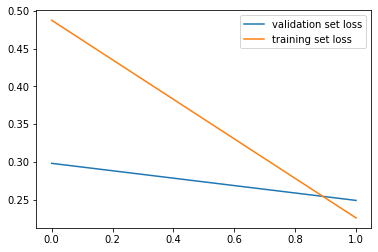

In [36]:
plt.plot(result['val_loss'],label="validation set loss")
plt.plot(result['loss'],label="training set loss")
plt.legend()
plt.show()

In [37]:
model.evaluate(x_val,y_val)

5000/5000 [==============================] - 1s 235us/step


[0.24896789679527281, 0.8952000141143799]

# loading test data

In [38]:
testdata=pd.read_csv('./Test/Test.csv')

In [39]:
testdata.shape

(10000, 1)

In [40]:
testdata.head()

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [41]:
testdata['cleanedreview']=testdata['review'].apply(cleantext)

In [42]:
x_test=testdata['cleanedreview']

In [43]:
x_test=cv.transform(x_test)

In [44]:
x_test.shape

(10000, 50000)

In [45]:
x_test=tfidf.transform(x_test)

In [168]:
#print(x_test[0])

## Prediction

In [46]:
y_pred=model.predict(x_test)

In [47]:
y_pred

array([[0.05008644],
       [0.05670045],
       [0.0055355 ],
       ...,
       [0.9931879 ],
       [0.99151343],
       [0.02649628]], dtype=float32)

In [48]:
y_pred[y_pred>=0.5]=1

In [49]:
y_pred[y_pred<0.5]=0

In [50]:
y_pred=y_pred.astype('int')

In [51]:
y_pred[:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [52]:
dict={0:'neg',1:'pos'}
y_pred=[dict[p[0]] for p in y_pred]

In [53]:
y_pred[:10]

['neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos']

In [54]:
ids=np.arange(10000)

In [55]:
resultant=np.stack((ids,y_pred),axis=1)

In [56]:
df=pd.DataFrame(resultant,columns=['Id','label'])

In [57]:
df.to_csv("y_predictionMLP",index=False)